In [ ]:
# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Read CSV file
import pandas as pd

# Replace 'alerts.csv' with the uploaded filename if different
df = pd.read_csv('alerts.csv', encoding='ISO-8859-1')
alert_descriptions = df['AlertDescription'].astype(str).tolist()







Saving alerts.csv to alerts (1).csv


In [ ]:
# Step 3: Compute TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(alert_descriptions)

In [ ]:
# Step 4: Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 5: Find duplicates above threshold
threshold = 0.85
duplicates = []

for i in range(len(alert_descriptions)):
    for j in range(i + 1, len(alert_descriptions)):
        sim = cosine_sim_matrix[i][j]
        if sim > threshold:
            duplicates.append({
                'Alert_1': alert_descriptions[i],
                'Alert_2': alert_descriptions[j],
                'Similarity': round(sim, 3)
            })

duplicates_df = pd.DataFrame(duplicates)


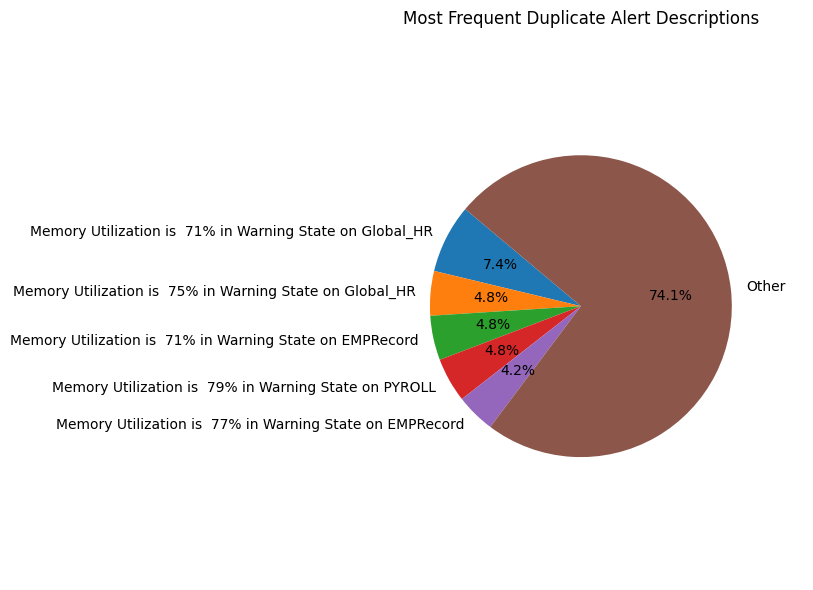

In [ ]:
# Step 6: Count frequency of duplicate alerts
from collections import Counter

alert_counts = Counter(duplicates_df['Alert_1'].tolist() + duplicates_df['Alert_2'].tolist())
top_alerts = dict(alert_counts.most_common(5))
other_count = sum(alert_counts.values()) - sum(top_alerts.values())
top_alerts['Other'] = other_count

# Step 7: Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(top_alerts.values(), labels=top_alerts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Most Frequent Duplicate Alert Descriptions')
plt.axis('equal')
plt.tight_layout()
plt.show()